In [10]:
!pip install hmmlearn
!pip install librosa

# Q1. Use HMM for classification of your speech signal using STFT features

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

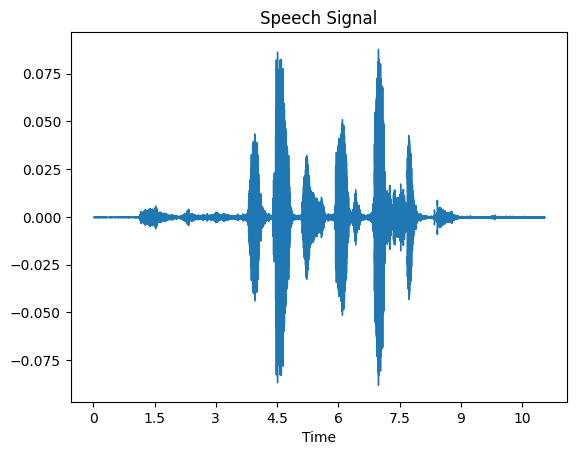

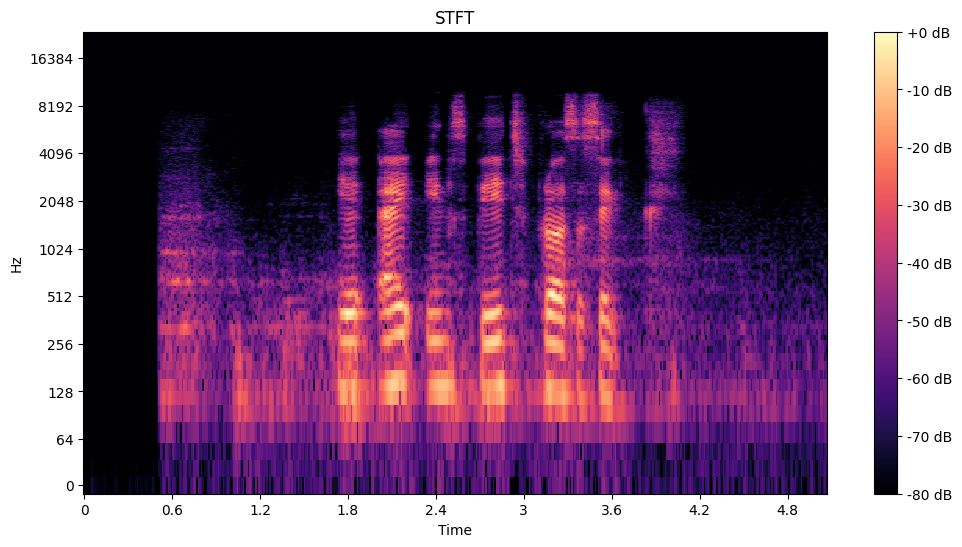

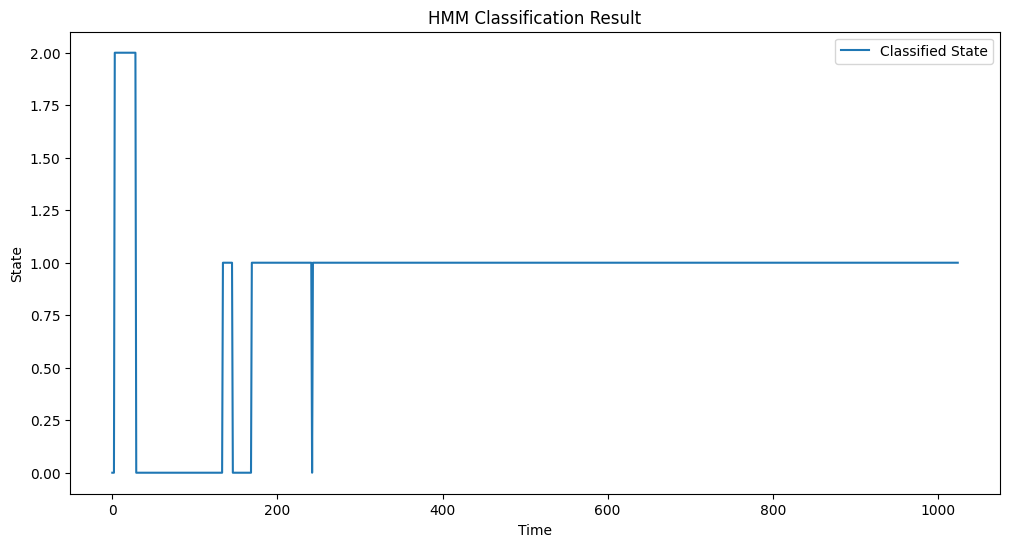

HMM Model Parameters:
Transition Matrix:
[[0.96969697 0.02272727 0.00757576]
 [0.00230947 0.99769053 0.        ]
 [0.03846154 0.         0.96153846]]
Means:
[[0.00041521 0.00055656 0.00057093 ... 0.00178701 0.00216123 0.00196747]
 [0.00029025 0.00040878 0.00042535 ... 0.00042296 0.00041006 0.00038363]
 [0.00064471 0.0006816  0.00066012 ... 0.01693432 0.01613958 0.01487965]]
Covariances:
[[[7.58336507e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 7.58455484e-05 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 7.58302915e-05 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.92227575e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   8.17358641e-05 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 7.96140339e-05

In [14]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features.T)  # Transpose features to fit HMM's requirement
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features)
    return labels

def main():
    audio_file_path = "/content/drive/MyDrive/AI_SP/AI_SP_audio.wav"

    # Load audio
    y, sr = load_audio(audio_file_path)
    librosa.display.waveshow(y)
    plt.title('Speech Signal')

    # Extract STFT features
    stft = stft_features(y, sr)

    # Plot STFT
    plot_stft(stft, sr)

    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement

    # Classify signal using trained HMM
    labels = classify_signal(model, stft)

    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()